In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import json
import random
import sys

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_column', 500)

In [4]:
df = pd.read_csv('../tps-jun-2022/data.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,-1.416075,1.201521,0.551902,-0.759827,NaN,2,2,0,3,2,1,1,3,2,2,3,3,2,5,4,1,0,1,0,2,1,2,0,1,2,-0.240522,0.061529,0.561090,-0.171943,-0.431996,0.473508,0.596924,0.819306,1.479061,1.264616,-1.116881,0.759443,-0.086915,-0.620685,0.057216,1.076380,-0.780608,-1.940907,-0.717021,0.599093,0.498347,0.118770,-0.228913,NaN,0.301610,5.547214,1.066871,-0.134313,-0.101040,-0.660871,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,-0.853630,0.674525,0.843058,-0.041438,0.259496,3,5,2,1,4,2,3,2,0,0,9,3,1,4,1,2,1,0,1,1,1,1,3,2,5,-0.446068,1.433358,0.040099,-1.994062,-0.602324,-0.611391,-1.151884,0.065485,0.352023,-0.843751,1.167272,0.921445,-0.839827,0.759015,-1.547387,0.720435,-0.944045,1.796462,-1.046357,-0.581515,0.704543,0.375222,0.705963,0.032771,NaN,-1.707374,-1.188114,-0.562419,-1.462988,1.290672,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,-0.073235,-1.381605,-0.108676,0.703693,-0.464042,3,2,1,3,2,1,0,6,1,1,3,4,1,2,2,1,2,2,4,8,1,5,1,2,4,-0.770592,0.483139,-0.636484,-1.305018,-2.089889,0.276761,-1.208640,-0.855769,0.232363,0.215841,-1.031405,0.582437,-0.314639,-0.497409,0.489356,0.915049,-0.513410,0.904206,-0.056089,0.212927,-0.574126,-1.517749,-0.888472,0.142264,1.000822,1.914908,3.877128,NaN,0.358635,0.443973,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,-0.618973,0.742112,0.494157,0.744673,-0.769181,2,3,2,1,1,1,2,0,6,2,6,2,1,1,2,3,1,2,1,2,6,2,1,0,2,-0.691020,-1.003026,0.868989,0.464920,NaN,0.499838,0.203723,-0.451576,-1.233499,0.903493,1.144558,-1.479893,-0.414316,0.024820,-0.976814,0.176633,-0.940022,-1.918049,1.506448,0.604388,0.578250,-0.122676,-0.711811,0.228523,0.999599,-2.638262,0.546676,0.865400,-0.857077,2.667105,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,1.338692,1.193330,1.038010,-0.763692,0.513466,5,0,1,3,3,0,2,5,1,3,5,5,4,4,2,0,2,3,2,5,2,2,1,0,4,1.196402,1.076537,0.486482,0.424305,0.475876,0.426978,-1.668823,-0.843056,1.008980,-0.704152,-0.894834,1.491608,-0.149938,1.256330,2.427308,0.878677,0.594314,0.380175,0.666499,-0.664403,1.276316,NaN,-1.276574,-0.768874,1.852815,-0.230342,-0.459019,1.128705,-0.748683,NaN,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,1000000.0,499999.500000,288675.278933,0.000000,249999.750000,499999.500000,749999.250000,999999.000000
F_1_0,981603.0,-0.000687,1.000784,-4.664447,-0.674667,-0.000769,0.673181,5.039177
F_1_1,981784.0,0.002091,0.999878,-4.790594,-0.672284,0.002049,0.675997,5.042807
F_1_2,981992.0,0.000551,0.999825,-4.870645,-0.673783,0.001386,0.674490,5.130025
F_1_3,981750.0,0.000982,0.999847,-5.053023,-0.672211,0.000370,0.674852,5.462472
F_1_4,981678.0,0.002437,1.001151,-5.363454,-0.672326,0.002733,0.676588,4.856916
F_1_5,981911.0,0.000635,0.999927,-5.508223,-0.673884,0.000276,0.675951,4.960724
F_1_6,981867.0,-0.000124,1.000427,-5.199170,-0.674834,0.000814,0.673983,4.957977
F_1_7,981872.0,-0.063857,0.725986,-6.990302,-0.500305,0.000578,0.444337,2.527570
F_1_8,981838.0,-0.000014,1.000715,-4.566593,-0.674006,-0.000047,0.674295,4.886075


In [10]:
print(f'Data shape: There are {df.shape[0]:,.0f} rows and {df.shape[1]:,.0f} columns.' + 
      f'\nMissing values = {df.isna().sum().sum():,.0f}, duplicates = {df.duplicated().sum():,.0f}.')

Data shape: There are 1,000,000 rows and 81 columns.
Missing values = 1,000,000, duplicates = 0.


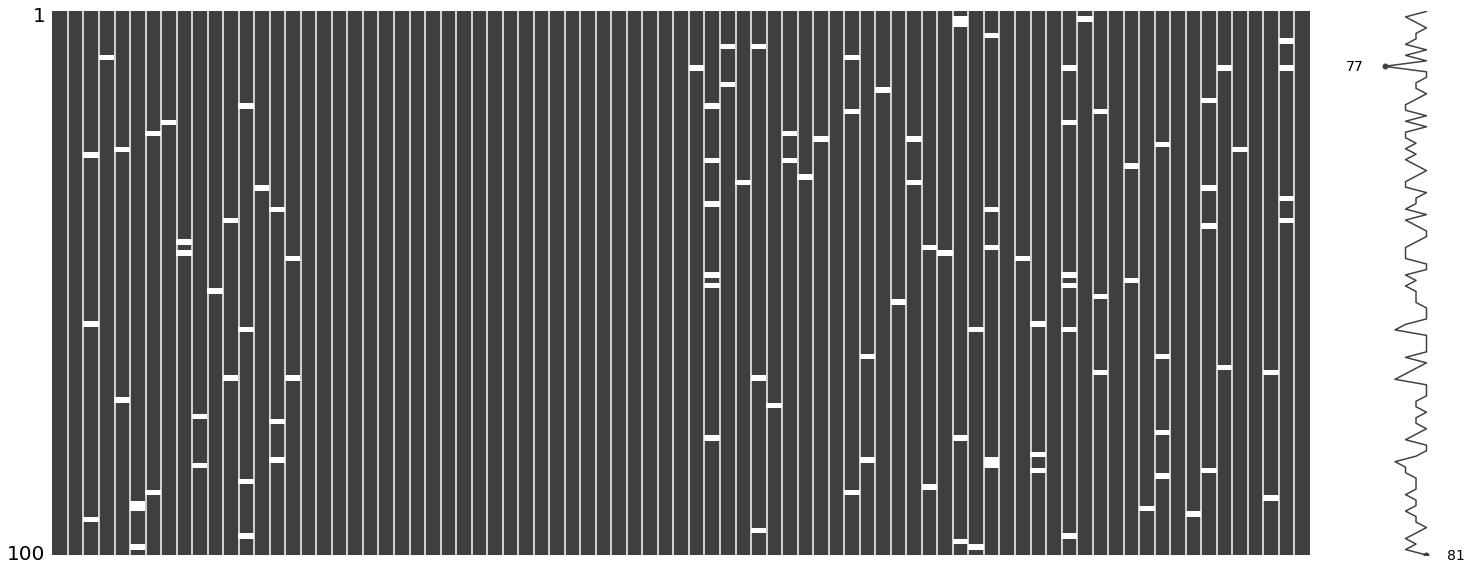

In [14]:
import missingno as msno
msno.matrix(df.sample(100))
plt.show()

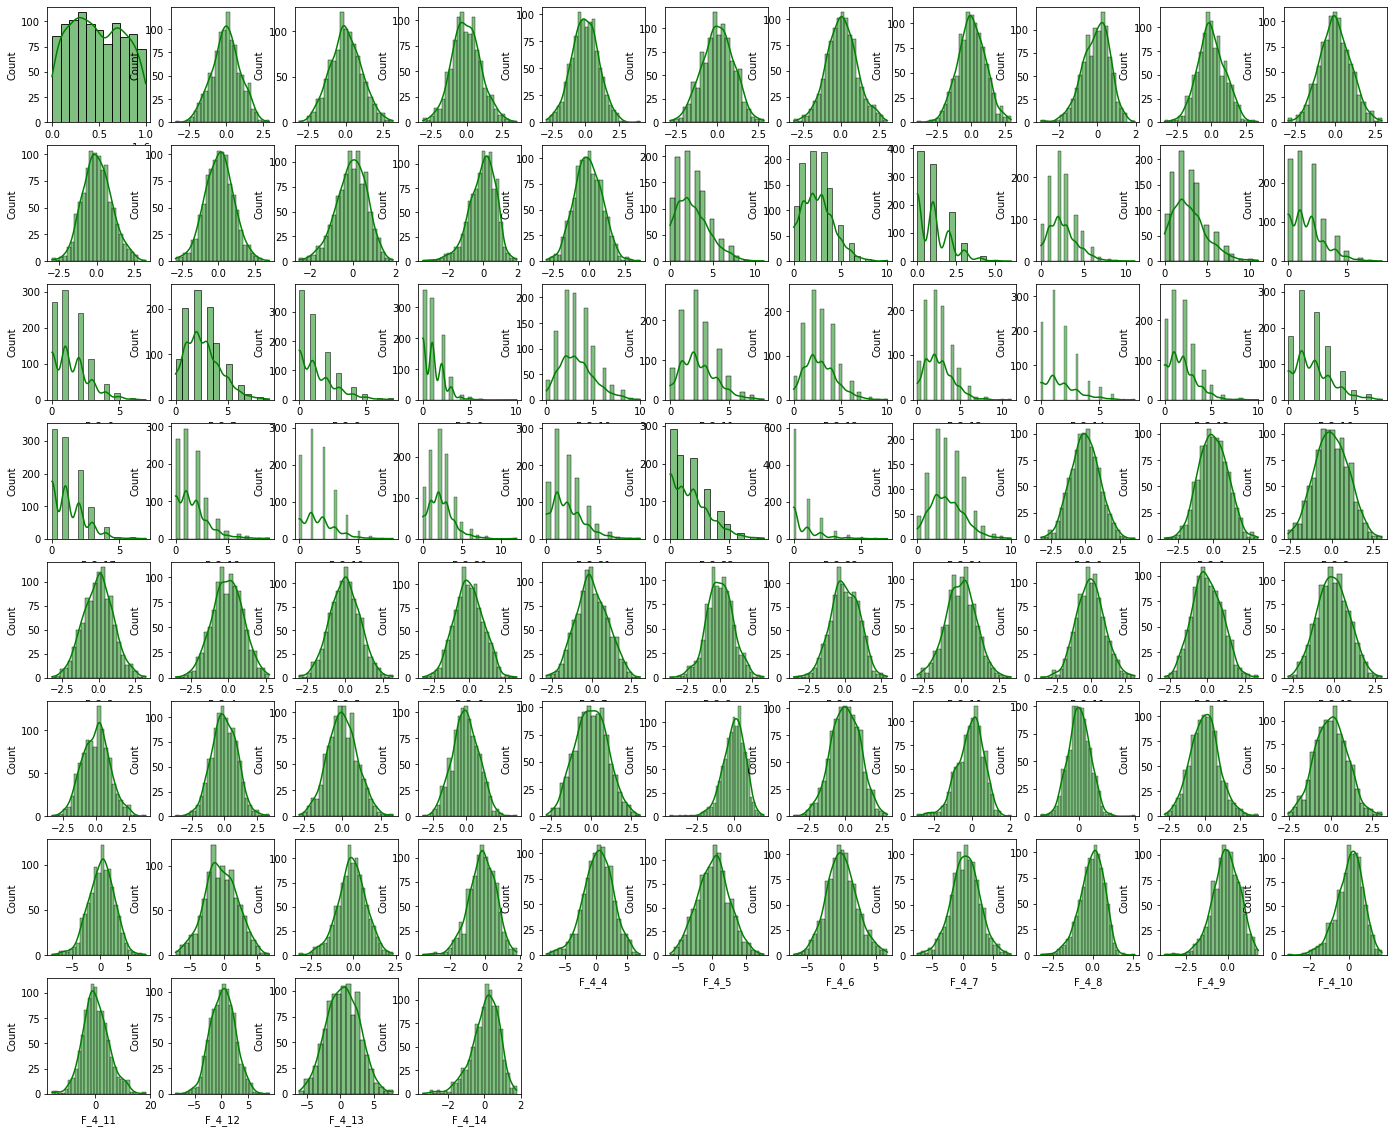

In [16]:
plt.figure(figsize=(24, 20))
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(8, 11, i)
    sns.histplot(x=column, data=df.sample(1000), 
                 stat='count', kde=True, color='green')

# Complete Case Analysis (CCA)

In [18]:
na_variables = [var for var in df.columns if df[var].isnull().mean() > 0]
data_na = df[na_variables].isnull().mean()

data_cca = df.dropna(axis=0)

data_cca.shape

(364774, 81)

In [19]:
df.shape

(1000000, 81)

# Arbitrary Value Imputation

In [20]:
train_df = df.copy()

na_variables = [var for var in train_df.columns if train_df[var].isnull().mean() > 0]

In [21]:
arb_impute = train_df['F_1_0'].fillna(random.choice(train_df['F_1_0'].unique()))
arb_impute.unique()

array([-0.354591,  1.38094 ,  0.256023, ...,  0.147534, -1.709886,
       -0.80638 ])

# Frequent Category Imputation

In [22]:
train_df['F_1_0'].groupby(train_df['F_1_0']).count()

F_1_0
-4.664447    1
-4.580050    1
-4.528789    1
-4.439416    1
-4.421259    1
            ..
 4.364633    1
 4.367183    1
 4.484467    1
 4.524054    1
 5.039177    1
Name: F_1_0, Length: 859226, dtype: int64

In [23]:
train_df['F_1_0'].mode()

0   -0.665735
1   -0.588953
2    0.008565
3    0.473098
4    0.536028
5    0.696120
Name: F_1_0, dtype: float64

In [24]:
frq_impute = train_df['F_1_0'].fillna('-0.665735')
frq_impute.unique()

array([-0.354591, 1.38094, 0.256023, ..., 0.147534, -1.709886, -0.80638],
      dtype=object)

# Statistical Values Imputation

In [25]:
xdf = df.copy()

average = xdf.F_1_0.mean()
std = xdf.F_1_0.std()
count_nan_age = xdf.F_1_0.isnull().sum()

rand = np.random.randint(average - 2* std, average + 2* std, size=count_nan_age)

print(f'Before: {xdf.F_1_0.isnull().sum()}')

xdf['F_1_0'][np.isnan(xdf['F_1_0'])] = rand
print(f'After : {xdf.F_1_0.isnull().sum()}')

Before: 18397
After : 0


C:\Users\Fan\AppData\Local\Temp\ipykernel_82028\2087944051.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xdf['F_1_0'][np.isnan(xdf['F_1_0'])] = rand
